# Generate routes

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.cluster import KMeans

In [2]:
data_stops = pd.read_csv('data/uni_molde_v3.csv', sep=';')

data_stops
data_stops.loc[data_stops['stop_completed_at'].isna(), 'stop_completed_at'] = "-1"
data_stops.loc[data_stops['stop_arrived_at'].isna(), 'stop_arrived_at'] = "-1"

print(data_stops.isnull().sum())


sorted_data_stops = data_stops.sort_values(by='stop_dispatched_at', ascending=True)
sorted_data_stops = sorted_data_stops.reset_index(drop=True)
sorted_data_stops['day_of_week'] = pd.to_datetime(sorted_data_stops['stop_dispatched_at']).dt.day_name()
sorted_data_stops['date'] = pd.to_datetime(sorted_data_stops['stop_dispatched_at']).dt.date

#clustering
locations_df = sorted_data_stops[['current_lat', 'current_lng']]
kmeans = KMeans(n_clusters=1000, random_state=42)
kmeans.fit(locations_df)
sorted_data_stops['cluster'] = kmeans.labels_ + 1

sorted_data_stops['location_id_craft'] = sorted_data_stops.groupby(['current_lat', 'current_lng']).ngroup()+1
with open('output.txt', 'w') as f:
    print(sorted_data_stops.to_string(), file=f)
print('number of groups', sorted_data_stops['location_id_craft'].nunique())

# data_stops_day= sorted_data_stops[sorted_data_stops['day_of_week'] == "Wednesday"]
grouped_df = sorted_data_stops.groupby('driver_workday_id')[['driver_id', 'location_type_id', 'address_id', 'stop_dispatched_at', 'stop_arrived_at', 'stop_earliest', 'stop_latest', 'current_lat', 'current_lng', 'stop_completed_at', 'cluster', 'location_id_craft','day_of_week', 'date', 'location_is_depot']].apply(lambda x: pd.Series({
    'driver_id': x['driver_id'].tolist(),
    'location_type_id': x['location_type_id'].tolist(),
    'planned_route_location': x['address_id'].tolist(),
    'stop_dispatched_at': x['stop_dispatched_at'].tolist(),
    'stop_arrived_at': x['stop_arrived_at'].tolist(),
    'stop_earliest': x['stop_earliest'].tolist(),
    'stop_latest': x['stop_latest'].tolist(),
    'current_lat': x['current_lat'].tolist(),
    'current_lng': x['current_lng'].tolist(),
    'stop_completed_at': x['stop_completed_at'].tolist(),
    'planned_route_cluster': x['cluster'].tolist(),
    'planned_route_craft': x['location_id_craft'].tolist(),
    'day_of_week': x['day_of_week'].tolist(),
    'location_is_depot': x['location_is_depot'].tolist(),
    'date': x['date'].tolist()
})).reset_index()
grouped_df

stop_completed_at         0
stop_arrived_at           0
stop_latest               0
stop_earliest             0
stop_dispatched_at        0
location_id               0
location_type_id          0
driver_workday_id         0
address_id                0
location_is_depot         0
driver_id                 0
current_lat               0
current_lng               0
prev_planned_lat      27440
prev_planned_lng      27440
prev_actual_lat       27440
prev_actual_lng       27440
dtype: int64
number of groups 11589


,driver_workday_id,driver_id,location_type_id,planned_route_location,stop_dispatched_at,stop_arrived_at,stop_earliest,stop_latest,current_lat,current_lng,stop_completed_at,planned_route_cluster,planned_route_craft,day_of_week,location_is_depot,date
0,297900,"[1255, 1255, 1255, 1255, 1255, 1255, 1255, 125...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 118973, 118854, 118820, 118623, 11909...","[2024-01-01 19:41:35.136881+00, 2024-01-01 19:...","[2024-01-01 22:14:16.454324+00, 2024-01-01 23:...","[2024-01-01 19:00:00+00, 2024-01-01 23:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 03:00:00+0...","[55.6465393, 55.6669147, 55.676665, 55.6757322...","[12.1522978, 12.5262801, 12.566428, 12.5619711...","[2024-01-01 22:14:54.872731+00, 2024-01-01 23:...","[5, 777, 11, 728, 728, 281, 281, 281, 281, 405]","[1169, 1405, 1577, 1560, 1479, 1391, 1434, 141...","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, Fals...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0..."
1,297906,"[1195, 1195, 1195, 1195, 1195, 1195, 1195]","[1, 2, 2, 2, 2, 2, 2]","[122267, 120295, 120297, 118930, 120298, 13328...","[2024-01-01 19:42:05.147145+00, 2024-01-01 19:...","[2024-01-01 20:50:17.003744+00, 2024-01-02 02:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.6465393, 55.662018, 55.662429, 55.6727433,...","[12.1522978, 12.360745, 12.363469, 12.3935111,...","[2024-01-01 20:50:29.721122+00, 2024-01-02 02:...","[5, 676, 676, 883, 676, 676, 676]","[1169, 1352, 1356, 1508, 1350, 1312, 1401]","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, False]","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0..."
2,297908,"[1176, 1176, 1176, 1176, 1176, 1176, 1176, 117...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[122267, 120515, 119217, 119215, 119170, 13445...","[2024-01-01 21:25:47.230131+00, 2024-01-01 21:...","[2024-01-01 23:06:27.627368+00, 2024-01-02 01:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.6465393, 55.619592, 55.636304, 55.631888, ...","[12.1522978, 12.028735, 12.044857, 12.055067, ...","[2024-01-01 23:06:36.064172+00, 2024-01-02 01:...","[5, 845, 443, 443, 634, 699, 787, 787, 787, 78...","[1169, 960, 1049, 1026, 982, 916, 1284, 1281, ...","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, Fals...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0..."
3,297911,"[1197, 1197, 1197, 1197, 1197, 1197, 1197, 119...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 145327, 133259, 133259, 133259, 13325...","[2024-01-01 19:42:59.704147+00, 2024-01-01 19:...","[2024-01-02 00:09:15.241119+00, 2024-01-02 04:...","[2024-01-02 00:00:00+00, 2024-01-02 04:30:00+0...","[2024-01-02 22:00:00+00, 2024-01-02 08:00:00+0...","[55.6465393, 54.65117396302384, 54.666191, 54....","[12.1522978, 11.375901220879824, 11.333044, 11...","[2024-01-02 00:09:21.131516+00, 2024-01-02 04:...","[5, 872, 77, 77, 77, 77, 77, 77, 533, 872]","[1169, 7, 23, 23, 23, 23, 23, 23, 12, 4]","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, Fals...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0..."
4,297919,"[1218, 1218, 1218, 1218, 1218, 1218, 1218, 121...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 119426, 118790, 119069, 118805, 11885...","[2024-01-01 19:46:51.16173+00, 2024-01-01 19:4...","[2024-01-01 23:05:52.039818+00, 2024-01-02 01:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.6465393, 55.62296, 55.562168, 55.6381577, ...","[12.1522978, 12.615835, 12.576841, 12.6515491,...","[2024-01-01 23:05:58.283704+00, 2024-01-02 01:...","[5, 286, 472, 139, 266, 405, 405, 178, 359, 57...","[1169, 965, 818, 1070, 1658, 1168, 1166, 888, ...","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False

In [3]:
from geopy.distance import geodesic
import pandas as pd

# Function to calculate distance between two coordinates
def calculate_distance(row):
    distances = []
    for i in range(len(row['planned_route_craft'])-1):
        coords_1 = (sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['planned_route_craft'][i], ['current_lat']].values[0][0],
                     sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['planned_route_craft'][i], ['current_lng']].values[0][0])
        coords_2 = (sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['planned_route_craft'][i+1], ['current_lat']].values[0][0],
                     sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['planned_route_craft'][i+1], ['current_lng']].values[0][0])
        distances.append(geodesic(coords_1, coords_2).miles)
    return distances
def calculate_distance_actual(row):
    distances = []
    for i in range(len(row['actual_route_location'])-1):
        coords_1 = (sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['actual_route_location'][i], ['current_lat']].values[0][0],
                     sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['actual_route_location'][i], ['current_lng']].values[0][0])
        coords_2 = (sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['actual_route_location'][i+1], ['current_lat']].values[0][0],
                     sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['actual_route_location'][i+1], ['current_lng']].values[0][0])
        distances.append(geodesic(coords_1, coords_2).miles)
    return distances

# Create a new column 'distance_route' in 'final_routes'
grouped_df['distance_route'] = grouped_df.apply(calculate_distance, axis=1)

In [4]:
grouped_df['total_distance_planned'] = grouped_df['distance_route'].apply(sum)
grouped_df

,driver_workday_id,driver_id,location_type_id,planned_route_location,stop_dispatched_at,stop_arrived_at,stop_earliest,stop_latest,current_lat,current_lng,stop_completed_at,planned_route_cluster,planned_route_craft,day_of_week,location_is_depot,date,distance_route,total_distance_planned
0,297900,"[1255, 1255, 1255, 1255, 1255, 1255, 1255, 125...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 118973, 118854, 118820, 118623, 11909...","[2024-01-01 19:41:35.136881+00, 2024-01-01 19:...","[2024-01-01 22:14:16.454324+00, 2024-01-01 23:...","[2024-01-01 19:00:00+00, 2024-01-01 23:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 03:00:00+0...","[55.6465393, 55.6669147, 55.676665, 55.6757322...","[12.1522978, 12.5262801, 12.566428, 12.5619711...","[2024-01-01 22:14:54.872731+00, 2024-01-01 23:...","[5, 777, 11, 728, 728, 281, 281, 281, 281, 405]","[1169, 1405, 1577, 1560, 1479, 1391, 1434, 141...","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, Fals...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[14.694940475474436, 1.7084597707961175, 0.185...",19.039848
1,297906,"[1195, 1195, 1195, 1195, 1195, 1195, 1195]","[1, 2, 2, 2, 2, 2, 2]","[122267, 120295, 120297, 118930, 120298, 13328...","[2024-01-01 19:42:05.147145+00, 2024-01-01 19:...","[2024-01-01 20:50:17.003744+00, 2024-01-02 02:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.6465393, 55.662018, 55.662429, 55.6727433,...","[12.1522978, 12.360745, 12.363469, 12.3935111,...","[2024-01-01 20:50:29.721122+00, 2024-01-02 02:...","[5, 676, 676, 883, 676, 676, 676]","[1169, 1352, 1356, 1508, 1350, 1312, 1401]","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, False]","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[8.223311758249285, 0.11025550750368773, 1.374...",12.124804
2,297908,"[1176, 1176, 1176, 1176, 1176, 1176, 1176, 117...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[122267, 120515, 119217, 119215, 119170, 13445...","[2024-01-01 21:25:47.230131+00, 2024-01-01 21:...","[2024-01-01 23:06:27.627368+00, 2024-01-02 01:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.6465393, 55.619592, 55.636304, 55.631888, ...","[12.1522978, 12.028735, 12.044857, 12.055067, ...","[2024-01-01 23:06:36.064172+00, 2024-01-02 01:...","[5, 845, 443, 443, 634, 699, 787, 787, 787, 78...","[1169, 960, 1049, 1026, 982, 916, 1284, 1281, ...","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, Fals...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[5.182600931419761, 1.3171408361998556, 0.5029...",56.772919
3,297911,"[1197, 1197, 1197, 1197, 1197, 1197, 1197, 119...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 145327, 133259, 133259, 133259, 13325...","[2024-01-01 19:42:59.704147+00, 2024-01-01 19:...","[2024-01-02 00:09:15.241119+00, 2024-01-02 04:...","[2024-01-02 00:00:00+00, 2024-01-02 04:30:00+0...","[2024-01-02 22:00:00+00, 2024-01-02 08:00:00+0...","[55.6465393, 54.65117396302384, 54.666191, 54....","[12.1522978, 11.375901220879824, 11.333044, 11...","[2024-01-02 00:09:21.131516+00, 2024-01-02 04:...","[5, 872, 77, 77, 77, 77, 77, 77, 533, 872]","[1169, 7, 23, 23, 23, 23, 23, 23, 12, 4]","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, Fals...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[75.41095073521456, 2.0081266994719744, 0.0, 0...",79.685240
4,297919,"[1218, 1218, 1218, 1218, 1218, 1218, 1218, 121...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 119426, 118790, 119069, 118805, 11885...","[2024-01-01 19:46:51.16173+00, 2024-01-01 19:4...","[2024-01-01 23:05:52.039818+00, 2024-01-02 01:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.6465393, 55.62296, 55.562168, 55.6381577, ...","[12.1522978, 1

In [5]:
routes = grouped_df[grouped_df.apply(lambda row: max(row['stop_dispatched_at']) < min(row['stop_completed_at']), axis=1)]
routes = routes.reset_index(drop=True)
len(routes)

20692

In [6]:
index_routes_with_na = []
for i in range(len(routes)):
    row = routes.iloc[i]
    if "-1" in row['stop_arrived_at']:
        index_routes_with_na.append(i)
print("The number of routes where one value is NA(arrived time)", len(index_routes_with_na))
print(index_routes_with_na)
routes = routes.drop(index_routes_with_na)
routes.reset_index(drop=True)

The number of routes where one value is NA(arrived time) 23
[1187, 1464, 1688, 1746, 2113, 3424, 3880, 4471, 4974, 5098, 5172, 5182, 5540, 5787, 6476, 7626, 10793, 11161, 11621, 13845, 17739, 19786, 20033]


,driver_workday_id,driver_id,location_type_id,planned_route_location,stop_dispatched_at,stop_arrived_at,stop_earliest,stop_latest,current_lat,current_lng,stop_completed_at,planned_route_cluster,planned_route_craft,day_of_week,location_is_depot,date,distance_route,total_distance_planned
0,297900,"[1255, 1255, 1255, 1255, 1255, 1255, 1255, 125...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 118973, 118854, 118820, 118623, 11909...","[2024-01-01 19:41:35.136881+00, 2024-01-01 19:...","[2024-01-01 22:14:16.454324+00, 2024-01-01 23:...","[2024-01-01 19:00:00+00, 2024-01-01 23:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 03:00:00+0...","[55.6465393, 55.6669147, 55.676665, 55.6757322...","[12.1522978, 12.5262801, 12.566428, 12.5619711...","[2024-01-01 22:14:54.872731+00, 2024-01-01 23:...","[5, 777, 11, 728, 728, 281, 281, 281, 281, 405]","[1169, 1405, 1577, 1560, 1479, 1391, 1434, 141...","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, Fals...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[14.694940475474436, 1.7084597707961175, 0.185...",19.039848
1,297906,"[1195, 1195, 1195, 1195, 1195, 1195, 1195]","[1, 2, 2, 2, 2, 2, 2]","[122267, 120295, 120297, 118930, 120298, 13328...","[2024-01-01 19:42:05.147145+00, 2024-01-01 19:...","[2024-01-01 20:50:17.003744+00, 2024-01-02 02:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.6465393, 55.662018, 55.662429, 55.6727433,...","[12.1522978, 12.360745, 12.363469, 12.3935111,...","[2024-01-01 20:50:29.721122+00, 2024-01-02 02:...","[5, 676, 676, 883, 676, 676, 676]","[1169, 1352, 1356, 1508, 1350, 1312, 1401]","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, False]","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[8.223311758249285, 0.11025550750368773, 1.374...",12.124804
2,297911,"[1197, 1197, 1197, 1197, 1197, 1197, 1197, 119...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 145327, 133259, 133259, 133259, 13325...","[2024-01-01 19:42:59.704147+00, 2024-01-01 19:...","[2024-01-02 00:09:15.241119+00, 2024-01-02 04:...","[2024-01-02 00:00:00+00, 2024-01-02 04:30:00+0...","[2024-01-02 22:00:00+00, 2024-01-02 08:00:00+0...","[55.6465393, 54.65117396302384, 54.666191, 54....","[12.1522978, 11.375901220879824, 11.333044, 11...","[2024-01-02 00:09:21.131516+00, 2024-01-02 04:...","[5, 872, 77, 77, 77, 77, 77, 77, 533, 872]","[1169, 7, 23, 23, 23, 23, 23, 23, 12, 4]","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, Fals...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[75.41095073521456, 2.0081266994719744, 0.0, 0...",79.685240
3,297919,"[1218, 1218, 1218, 1218, 1218, 1218, 1218, 121...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 119426, 118790, 119069, 118805, 11885...","[2024-01-01 19:46:51.16173+00, 2024-01-01 19:4...","[2024-01-01 23:05:52.039818+00, 2024-01-02 01:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.6465393, 55.62296, 55.562168, 55.6381577, ...","[12.1522978, 12.615835, 12.576841, 12.6515491,...","[2024-01-01 23:05:58.283704+00, 2024-01-02 01:...","[5, 286, 472, 139, 266, 405, 405, 178, 359, 57...","[1169, 965, 818, 1070, 1658, 1168, 1166, 888, ...","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, Fals...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[18.213184104634966, 4.474441733294021, 6.0165...",54.345069
4,297922,"[1192, 1192, 1192, 1192, 1192, 1192, 1192, 119...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 119416, 119195, 119179, 119149, 11918...","[2024-01-01 19:36:39.7416+00, 2024-01-01 19:36...","[2024-01-01 23:00:15.671794+00, 2024-01-01 23:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.6465393, 55.646256, 55.652754, 55.654614, ...","[12.1522978, 12.11

In [177]:
#check if it is the same driver in the route
for i in routes['driver_id']:
    if not all(x == i[0] for x in i):
            print('Not the same driver in the route')
routes['driver_id'] = routes['driver_id'].apply(lambda x : x[0])

routes['day_of_week'] = routes['day_of_week'].apply(lambda x : x[0])
routes['date'] = routes['date'].apply(lambda x : x[0])

routes['date'] = pd.to_datetime(routes['date'])
routes['last_two_weeks_count'] = routes.apply(lambda row:
                                      routes[(routes['driver_id'] == row['driver_id']) &
                                         (row['date'] - routes['date']).dt.days.between(-14, 0)].shape[0],
                                      axis=1)
routes = routes[(routes['date'] < '2024-01-01') | (routes['date'] > '2024-01-14')]
routes['location_type_id'] = routes['location_type_id'].apply(lambda x: [0 if i == 1 else 1 for i in x])
routes['location_is_depot'] = routes['location_is_depot'].apply(lambda x: [int(value) for value in x])




TypeError: 'int' object is not iterable

In [178]:
routes = routes.reset_index(drop=True)

In [179]:
def create_actual_route(df, column):
    res_col = []
    for i in range(len(df)):
        row = df.iloc[i]
        sorted_dates = sorted(row['stop_arrived_at'])
        mapping = {}
        for i, date in enumerate(sorted_dates):
            mapping[date] = row[column][i]
        res_val = [mapping[row['stop_arrived_at'][i]] for i in range(len(row['stop_arrived_at']))]
        res_col.append(res_val)
    return res_col

routes['actual_route_location'] = create_actual_route(routes, 'planned_route_craft')
routes['distance_actual_route'] = routes.apply(calculate_distance_actual, axis=1)
routes['total_distance_actual'] = routes['distance_actual_route'].apply(sum)
routes['difference_distance'] = (routes['total_distance_actual'] - routes['total_distance_planned'])/routes['total_distance_planned']

#remove all the routes with length <= 2
routes = routes[routes['planned_route_location'].apply(lambda x: len(x) > 2)]
routes = routes.reset_index(drop=True)

KeyboardInterrupt: 

In [181]:
len(routes)

18579

In [ ]:
planned_routes = routes[['planned_route_craft', 'actual_route_location', 'driver_id', 'day_of_week', 'last_two_weeks_count', 'location_type_id', 'stop_arrived_at', 'stop_earliest', 'stop_latest', 'current_lat', 'current_lng', 'difference_distance', 'distance_route', 'location_is_depot', 'location_type_id']]
actual_routes = routes['actual_route_location']

In [182]:
planned_routes_list = planned_routes['planned_route_craft'].tolist()
actual_routes_list = actual_routes.tolist()

# filtered_rows = []
#
# for row in actual_routes_list:
#     if row not in planned_routes_list:
#         filtered_rows.append(row)

#duplicated removed
# planned_routes_list = [array for i, array in enumerate(planned_routes_list) if array not in planned_routes_list[:i]]
# actual_routes_list = [array for i, array in enumerate(filtered_rows) if array not in filtered_rows[:i]]
len(planned_routes_list),len(actual_routes_list)

(18579, 18579)

In [ ]:
planned_routes

# Edit distance

In [ ]:
# Edit Distance

def minDistance(word1, word2) -> int:
    m = len(word1)
    n = len(word2)
    # dp[i][j] := min # Of operations to convert word1[0..i) to word2[0..j)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1, m + 1):
      dp[i][0] = i

    for j in range(1, n + 1):
      dp[0][j] = j

    for i in range(1, m + 1):
      for j in range(1, n + 1):
        if word1[i - 1] == word2[j - 1]:
          dp[i][j] = dp[i - 1][j - 1]
        else:
          dp[i][j] = min(dp[i - 1][j - 1], dp[i - 1][j], dp[i][j - 1]) + 1

    return dp[m][n]

print(minDistance([878, 1526, 1613, 1706, 1857, 1777], [878, 1526, 1706, 1613, 1777, 1857]))

# Route quality score

In [ ]:
def calculate_route_quality_score(planned_ranks, actual_ranks):
    # Calculate sum of absolute differences in ranks
    sum_of_differences = sum(abs(actual_ranks.index(x) - planned_ranks.index(x)) for x in planned_ranks)

    # Calculate max possible difference
    max_possible_difference = sum([abs(2 * i - (len(planned_ranks) + 1)) for i in range(1, len(planned_ranks) + 1)])

    # Calculate route quality score
    route_quality_score = 1 - (sum_of_differences / max_possible_difference)

    return route_quality_score

In [ ]:
planned_routes_list[1227], actual_routes_list[1227]

For each driver-day, we consider only the planned route. For each planned route we calculate how much it deviates from the actual route (e.g., use some form of edit distance - see https://link.springer.com/article/10.1007/s10732-006-9001-3?), which is then normalized (divide by max edit distance, or number of visits or something?) to the interval [0, 1]. Then, a planned route is good if this distance (between planned and actual) is less than a certain threshold and otherwise it is bad. This becomes the label (bad/good)

In [ ]:
import statistics
completed_routes_df = pd.DataFrame(columns=['planned_route_craft', 'actual_route_location', 'driver_id', 'day_of_week', 'distance_route', 'last_two_weeks_count', 'stop_arrived_at', 'stop_earliest', 'stop_latest', 'current_lat', 'current_lng', 'location_type_id', 'location_is_depot'])
uncompleted_routes_df = pd.DataFrame(columns=['planned_route_craft', 'actual_route_location', 'driver_id', 'day_of_week', 'distance_route', 'last_two_weeks_count', 'stop_arrived_at', 'stop_earliest', 'stop_latest', 'current_lat', 'current_lng', 'location_type_id', 'location_is_depot'])
#11700795
scores = []
edit_distances = []
completed_routes_list = []
uncompleted_routes_list = []
for i in range(len(planned_routes_list)):
    editDistance = minDistance(planned_routes_list[i], actual_routes_list[i]) / len(planned_routes_list[i])
    score = calculate_route_quality_score(planned_routes_list[i], actual_routes_list[i])
    scores.append(score)
    edit_distances.append(editDistance)

    # if editDistance > 0.05 and score < 0.95 and planned_routes['difference_distance'].iloc[i] > 0.01:
    if editDistance <= 0.3 and score >= 0.7 and planned_routes['difference_distance'].iloc[i] <= 0.3:
        completed_routes_list.append(planned_routes.iloc[i].to_dict())
    else:
        uncompleted_routes_list.append(planned_routes.iloc[i].to_dict())

# Convert the lists to DataFrames
completed_routes_df = pd.DataFrame(completed_routes_list)
uncompleted_routes_df = pd.DataFrame(uncompleted_routes_list)

print(len(completed_routes_df), len(uncompleted_routes_df))
completed_routes_df

# Build graph for metrics

In [155]:
distances_without_outl = routes[routes['difference_distance'] > 0]['difference_distance']

# Count the number of elements greater than 2
count_more_than_2 = (distances_without_outl > 2).sum()
print(f'Number of elements greater than 2: {count_more_than_2}')

# Remove elements greater than 2
filtered_series = distances_without_outl[distances_without_outl <= 2]
max(filtered_series)

filtered_series

Number of elements greater than 2: 12


8        0.569081
10       0.038663
23       0.006369
25       0.435438
26       0.162129
           ...   
18563    0.138498
18566    0.337309
18569    0.003619
18571    0.031155
18572    0.510986
Name: difference_distance, Length: 10667, dtype: float64

<Figure size 800x600 with 0 Axes>

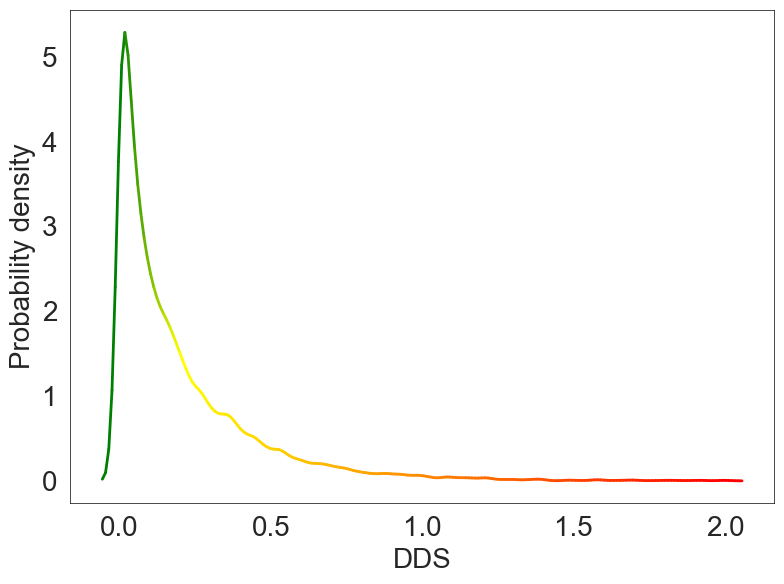

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# scores = [v for v in scores if v != 1]
# scores = pd.DataFrame(scores, columns=['Score'])
# # scores.describe()
#
# edit_distances = [v for v in edit_distances if v != 0]
# edit_distances = pd.DataFrame(edit_distances, columns=['Edit Distances'])
# edit_distances.describe()

# routes[routes['difference_distance'] > 0]['difference_distance'].describe()


# Set style and context for publication-ready figures
sns.set(style='white')

# Create a larger figure
plt.figure(figsize=(8, 6))
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'green_amber_red', [(0, 'green'), (0.1, 'yellow'), (0.4, 'orange'), (1, 'red')]
)

# Normalize the data for color mapping
norm = mpl.colors.Normalize(vmin=0, vmax=2)

# Calculate the KDE
kde = sns.kdeplot(filtered_series, fill=False, bw_adjust=0.5)
x, y = kde.get_lines()[0].get_data()

# Clear the plot to redraw with gradient
plt.clf()

# Set style and context for publication-ready figures
sns.set(style='white')

# Create a larger figure
plt.figure(figsize=(8, 6))

# Plot with gradient color
for i in range(len(x) - 1):
    plt.plot(x[i:i+2], y[i:i+2], color=cmap(norm(np.mean(x[i:i+2]))), linewidth=2)

# Add titles and labels
plt.xlabel('DDS', fontsize=20)
plt.ylabel('Probability density', fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=20)  # Major ticks
plt.tick_params(axis='both', which='minor', labelsize=20)  # Minor ticks (if any)

ax = plt.gca()  # Get the current axes
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Color of the border
    spine.set_linewidth(0.5)  # Thickness of the border

plt.tight_layout()
plt.grid(False)  # Remove gridlines

# Display the plot
plt.show()



In [ ]:
# Plot the distribution (histogram) of the scores
# plt.hist(scores, bins=10, edgecolor='black')
#
# # Adding titles and labels
# plt.title('Distribution of Scores')
# plt.xlabel('Score')
# plt.ylabel('Frequency')
#
# # Display the plot
# plt.show()

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
#
# # Assuming your data is in a Pandas DataFrame called 'df'
#
# # Faceted scatter plot
# sns.FacetGrid(completed_routes_df, col="day_of_week", col_wrap=3) \
#     .map(plt.scatter, "driver_id_sorted", "score") \
#     .set_titles("{col_name}")
#
# # Box plot with hue
# sns.boxplot(x="driver_id_sorted", y="score", hue="day_of_week", data=completed_routes_df)
# plt.legend(title="Day of Week")

In [ ]:
import folium
def build_route(lat_seq, lon_seq, color, earliest, latest, arrived, location_type_id, file_name, marker_bool = False):
    m = folium.Map(location=[lat_seq[0], lon_seq[0]], zoom_start=13)
    # Add a polyline with arrows
    offset = 0
    for i in range(len(lat_seq)):
        lat, lon = lat_seq[i], lon_seq[i]
        earliest_date = earliest[i]
        latest_date = latest[i]
        arrived_date = arrived[i]
        location_type = location_type_id[i]

        # Determine the marker color based on the arrived date being within the earliest and latest date range
        if marker_bool == False:
            marker_color = 'white'
        else:
            if earliest_date <= arrived_date <= latest_date:
                marker_color = 'green'
            else:
                marker_color = 'red'

        # Add an index label
        folium.Marker([lat + offset * 0.000001, lon + offset * 0.000001], icon=folium.DivIcon(html=f'<div style="font-size: 13pt; border: 1px solid white; border-radius: 50%; width: 1.2em; height: 1.2em; background-color: {marker_color}; border-radius: 50%;text-align: center;text-color: white;">{i+1}</div>')).add_to(m)

        # Add a red square marker for depots
        if location_type == 1:
            folium.Marker([lat + offset * 0.000001, lon + offset * 0.000001], icon=folium.Icon(color='red', icon='square', prefix='fa')).add_to(m)

        if i < len(lat_seq) - 1:
            next_lat, next_lon = lat_seq[i + 1], lon_seq[i + 1]
            angle = np.rad2deg(np.arctan2(next_lat - lat, next_lon - lon))
            arrow_lon = lon + 0.001 * np.cos(np.deg2rad(angle))

            # Add a line segment
            folium.PolyLine([[lat + offset * 0.000001, lon + offset * 0.000001], [next_lat, next_lon]], color=color, dash_array='5, 5').add_to(m)

            # Add an arrow at the end of the line segment
            folium.Marker([next_lat, next_lon], icon=folium.Icon(color=color, icon='arrow-up', prefix='fa')).add_to(m)

        # Increase the offset for the next node with the same location
        offset += 1

    m.save(file_name)

In [ ]:
uncompleted_routes_df

In [ ]:
def draw_planned_route(row_id):
    lats = uncompleted_routes_df["current_lat"].iloc[row_id]
    lngs = uncompleted_routes_df["current_lng"].iloc[row_id]
    earliests = uncompleted_routes_df["stop_earliest"].iloc[row_id]
    latests = uncompleted_routes_df["stop_latest"].iloc[row_id]
    arriveds = uncompleted_routes_df["stop_arrived_at"].iloc[row_id]
    location_types = uncompleted_routes_df["location_type_id"].iloc[row_id]
    build_route(lats, lngs, 'blue', earliests, latests, arriveds, location_types, f'planned_route_{row_id}.html')


In [ ]:
def draw_actual_route(row_id):
    mapping = {}
    row = uncompleted_routes_df.iloc[row_id]
    planned_route = row['planned_route_craft']
    actual_route = row['actual_route_location']
    longs = row['current_lng']
    lats = row['current_lat']
    earliest = row['stop_earliest']
    latest = row['stop_latest']
    arrived = row['stop_arrived_at']
    location_type_id = row['location_type_id']

    for i in range(len(planned_route)):
        mapping[planned_route[i]] = (longs[i], lats[i], earliest[i], latest[i],arrived[i], location_type_id[i])

    actual_longs = [mapping[location][0] for location in actual_route]
    actual_lats = [mapping[location][1] for location in actual_route]
    actual_earliest = [mapping[location][2] for location in actual_route]
    actual_latest = [mapping[location][3] for location in actual_route]
    actual_arrived = [mapping[location][4] for location in actual_route]
    actual_location_type_id = [mapping[location][5] for location in actual_route]


    build_route(actual_lats, actual_longs, 'red', actual_earliest, actual_latest, actual_arrived, actual_location_type_id, f'actual_route_{row_id}.html',True)

id = 13
draw_planned_route(id)
draw_actual_route(id)


In [ ]:
uncompleted_routes_df["current_lat"].iloc[22], uncompleted_routes_df["current_lng"].iloc[22]

In [ ]:

# uncompleted_routes_df = uncompleted_routes_df.sample(n=len(completed_routes_df), random_state=42)
len(completed_routes_df), len(uncompleted_routes_df)
# completed_routes_df

In [ ]:
# completed_routes_list_unique = [array for i, array in enumerate(completed_routes_list) if array not in completed_routes_list[:i]]
# uncompleted_routes_list_unique = [array for i, array in enumerate(uncompleted_routes_list) if array not in uncompleted_routes_list[:i]]
# len(completed_routes_list_unique), len (uncompleted_routes_list_unique)
# len(completed_routes_df), len(uncompleted_routes_df)

In [180]:
final_routes = pd.DataFrame({
    'routes': completed_routes_df['planned_route_craft'].tolist() + uncompleted_routes_df['planned_route_craft'].tolist(),
    'actual_routes': completed_routes_df['actual_route_location'].tolist() + uncompleted_routes_df['actual_route_location'].tolist(),
    'driver_id': completed_routes_df['driver_id'].tolist() +  uncompleted_routes_df['driver_id'].tolist(),
    'distance_route': completed_routes_df['distance_route'].tolist() + uncompleted_routes_df['distance_route'].tolist(),
    'last_two_weeks_count': completed_routes_df['last_two_weeks_count'].tolist() + uncompleted_routes_df['last_two_weeks_count'].tolist(),
    'current_lat': completed_routes_df['current_lat'].tolist() + uncompleted_routes_df['current_lat'].tolist(),
    'current_lng': completed_routes_df['current_lng'].tolist() + uncompleted_routes_df['current_lng'].tolist(),
    'day_of_week': completed_routes_df['day_of_week'].tolist() + uncompleted_routes_df['day_of_week'].tolist(),
    'location_is_depot': completed_routes_df['location_is_depot'].tolist() + uncompleted_routes_df['location_is_depot'].tolist(),
    'location_type_id': completed_routes_df['location_type_id'].tolist() + uncompleted_routes_df['location_type_id'].tolist(),
    'label': [0] * len(completed_routes_df)  + [1] * len(uncompleted_routes_df)
})
final_routes['len'] = final_routes['routes'].apply(lambda x: len(x))
final_routes

# [0] * len(artificial_planned_routes)
# artificial_planned_routes['distance_route'].tolist()
# artificial_planned_routes['driver_id'].tolist()
# artificial_planned_routes['common_subsequence'].tolist()

,routes,actual_routes,driver_id,distance_route,last_two_weeks_count,current_lat,current_lng,day_of_week,location_is_depot,location_type_id,label,len
0,"[5561, 4250, 4252]","[5561, 4250, 4252]",428,"[77.28853393240367, 1.978373586155687]",4,"[59.47300010000001, 58.623884, 58.627029]","[10.3183178, 8.910826, 8.856357]",Wednesday,"[0, 0, 0]","[0, 1, 1]",0,3
1,"[5561, 5558, 4743, 4955, 5808]","[5561, 5558, 4743, 4955, 5808]",429,"[0.09238270951687778, 18.32380796956901, 3.541...",5,"[59.47300010000001, 59.471681, 59.207043, 59.2...","[10.3183178, 10.318716, 10.306366, 10.256478, ...",Thursday,"[0, 1, 0, 0, 0]","[0, 0, 1, 1, 1]",0,5
2,"[11372, 11523, 11524, 11530]","[11372, 11523, 11524, 11530]",813,"[106.01131106955373, 0.08118943182044898, 11.4...",2,"[63.43263220000001, 64.860785, 64.861066, 64.8...","[10.3643774, 11.62453, 11.621855, 11.2369739]",Friday,"[1, 0, 0, 0]","[0, 1, 1, 1]",0,4
3,"[11372, 5561, 11372, 5561]","[11372, 5561, 11372, 5561]",1004,"[274.1824232018611, 274.1824232018611, 274.182...",1,"[63.43263220000001, 59.47300010000001, 63.4326...","[10.3643774, 10.3183178, 10.3643774, 10.3183178]",Friday,"[1, 0, 1, 0]","[0, 1, 0, 1]",0,4
4,"[11372, 11496, 11451]","[11372, 11496, 11451]",662,"[53.32959024614898, 23.585260805775995]",3,"[63.43263220000001, 64.0212619, 63.711729]","[10.3643774, 11.4841413, 11.16247]",Friday,"[1, 0, 0]","[0, 1, 1]",0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
18574,"[3162, 3243, 3295, 3295, 3280, 3249, 3281, 329...","[3162, 3243, 3295, 3295, 3281, 3296, 3273, 327...",1520,"[4.097697796278882, 2.827734737537246, 0.0, 0....",2,"[56.0667627, 56.1005391, 56.117045, 56.117045,...","[9.986944, 10.0739552, 10.1408688, 10.1408688,...",Monday,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1,20
18575,"[1167, 1174, 1167, 2231, 1970, 1949, 1954]","[1167, 1954, 1174, 1167, 1949, 2231, 1970]",1624,"[10.302891542998038, 10.302891542998038, 18.38...",1,"[55.64641920439919, 55.64716869999999, 55.6464...","[12.15372974969827, 12.4170801, 12.15372974969...",Monday,"[1, 0, 1, 0, 0, 0, 0]","[0, 1, 0, 1, 1, 1, 1]",1,7
18576,"[11372, 11173, 11150, 11158, 11157, 11154]","[11372, 11173, 11154, 11158, 11150, 11157]",441,"[26.980923351959824, 38.97044955780091, 1.9401...",2,"[63.43263220000001, 63.044793, 62.569893, 62.5...","[10.3643774, 10.283446, 9.623898, 9.659513, 9....",Tuesday,"[1, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1]",1,6
18577,"[3162, 3240, 3295, 3295, 3243, 3280, 3327, 332...","[3162, 3295, 3243, 3295, 3240, 3327, 3258, 324...",1520,"[3.9241224150190654, 3.0215328879604293, 0.0, ...",1,"[56.0667627, 56.1004096, 56.117045, 56.117045,...","[9.986944, 10.0686046, 10.1408688, 10.1408688,...",Tuesday,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...",1,24


In [157]:

max([len(i) for i in final_routes['routes']])

36

In [158]:
def determine_country(lat, lng):
    if 57.5 <= lat <= 71.2 and 4.0 <= lng <= 31.0:
        return 0  # Norway
    elif 54.5 <= lat <= 57.8 and 8.0 <= lng <= 15.0:
        return 1  # Denmark
    else:
        return 1
final_routes['country_flag'] = final_routes.apply(lambda row: determine_country(row['current_lat'][0], row['current_lng'][0]), axis=1)

final_routes.groupby(['country_flag', 'label']).size().reset_index(name='count')


,country_flag,label,count
0,0,0,5164
1,0,1,2747
2,1,0,3464
3,1,1,7204


In [159]:
#create dictionary and encode to smaller unique numbers
locations_dic = {}
location_count = {}
k = 1
for row in final_routes['routes']:
   for location in row:
       if location not in locations_dic:
           locations_dic[location] = k
           k += 1

print(len(locations_dic))

for row in final_routes['routes']:
   for location in row:
       if location not in location_count:
            location_count[location] = 1
       else:
            location_count[location] += 1


10707


In [160]:
drivers_dic = {}
k = 1
for driver in final_routes['driver_id']:
    if driver not in drivers_dic:
        drivers_dic[driver] = k
        k += 1
print('Total number of drivers', len(drivers_dic))
total_drivers = len(drivers_dic)
encoding_drivers = []
for driver in final_routes['driver_id']:
    encoding_drivers.append(drivers_dic[driver])
#
final_routes['driver_id_sorted'] = encoding_drivers
# final_routes = pd.concat([final_routes, pd.get_dummies(final_routes['driver_id_sorted'], prefix='encoding_drivers')], axis=1)
final_routes

Total number of drivers 395


,routes,actual_routes,driver_id,distance_route,last_two_weeks_count,current_lat,current_lng,day_of_week,location_is_depot,location_type_id,label,len,country_flag,driver_id_sorted
0,"[5561, 4250, 4252]","[5561, 4250, 4252]",428,"[77.28853393240367, 1.978373586155687]",4,"[59.47300010000001, 58.623884, 58.627029]","[10.3183178, 8.910826, 8.856357]",Wednesday,"[0, 0, 0]","[0, 1, 1]",0,3,0,1
1,"[5561, 5558, 4743, 4955, 5808]","[5561, 5558, 4743, 4955, 5808]",429,"[0.09238270951687778, 18.32380796956901, 3.541...",5,"[59.47300010000001, 59.471681, 59.207043, 59.2...","[10.3183178, 10.318716, 10.306366, 10.256478, ...",Thursday,"[0, 1, 0, 0, 0]","[0, 0, 1, 1, 1]",0,5,0,2
2,"[11372, 11523, 11524, 11530]","[11372, 11523, 11524, 11530]",813,"[106.01131106955373, 0.08118943182044898, 11.4...",2,"[63.43263220000001, 64.860785, 64.861066, 64.8...","[10.3643774, 11.62453, 11.621855, 11.2369739]",Friday,"[1, 0, 0, 0]","[0, 1, 1, 1]",0,4,0,3
3,"[11372, 5561, 11372, 5561]","[11372, 5561, 11372, 5561]",1004,"[274.1824232018611, 274.1824232018611, 274.182...",1,"[63.43263220000001, 59.47300010000001, 63.4326...","[10.3643774, 10.3183178, 10.3643774, 10.3183178]",Friday,"[1, 0, 1, 0]","[0, 1, 0, 1]",0,4,0,4
4,"[11372, 11496, 11451]","[11372, 11496, 11451]",662,"[53.32959024614898, 23.585260805775995]",3,"[63.43263220000001, 64.0212619, 63.711729]","[10.3643774, 11.4841413, 11.16247]",Friday,"[1, 0, 0]","[0, 1, 1]",0,3,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18574,"[3162, 3243, 3295, 3295, 3280, 3249, 3281, 329...","[3162, 3243, 3295, 3295, 3281, 3296, 3273, 327...",1520,"[4.097697796278882, 2.827734737537246, 0.0, 0....",2,"[56.0667627, 56.1005391, 56.117045, 56.117045,...","[9.986944, 10.0739552, 10.1408688, 10.1408688,...",Monday,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1,20,1,262
18575,"[1167, 1174, 1167, 2231, 1970, 1949, 1954]","[1167, 1954, 1174, 1167, 1949, 2231, 1970]",1624,"[10.302891542998038, 10.302891542998038, 18.38...",1,"[55.64641920439919, 55.64716869999999, 55.6464...","[12.15372974969827, 12.4170801, 12.15372974969...",Monday,"[1, 0, 1, 0, 0, 0, 0]","[0, 1, 0, 1, 1, 1, 1]",1,7,1,299
18576,"[11372, 11173, 11150, 11158, 11157, 11154]","[11372, 11173, 11154, 11158, 11150, 11157]",441,"[26.980923351959824, 38.97044955780091, 1.9401...",2,"[63.43263220000001, 63.044793, 62.569893, 62.5...","[10.3643774, 10.283446, 9.623898, 9.659513, 9....",Tuesday,"[1, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1]",1,6,0,171
18577,"[3162, 3240, 3295, 3295, 3243, 3280, 3327, 332...","[3162, 3295, 3243, 3295, 3240, 3327, 3258, 324...",1520,"[3.9241224150190654, 3.0215328879604293, 0.0, ...",1,"[56.0667627, 56.1004096, 56.117045, 56.117045,...","[9.986944, 10.0686046, 10.1408688, 10.1408688,...",Tuesday,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...",1,24,1,262


In [161]:
final_routes['day_of_week_encoded'] = pd.Categorical(final_routes['day_of_week']).codes+1

def encode_day_of_week(row):
    a = np.zeros((36, 7), dtype=int)
    route_len = row['len']
    day_encoded = row['day_of_week_encoded']
    for i in range(36 - route_len, len(a)):
        a[i][day_encoded-1] = 1
    return a

def encode_day_of_week_simple(row):
    a = np.zeros(7, dtype=int)
    day_encoded = row['day_of_week_encoded']
    a[day_encoded - 1] = 1

    return a

final_routes['experience_feature'] = final_routes.apply(lambda x: x['len'] * [x['last_two_weeks_count']], axis = 1)
final_routes['len_feature'] = final_routes.apply(lambda x: x['len'] * [x['len']], axis = 1)
final_routes['driver_id_feature'] = final_routes.apply(lambda x: x['len'] * [x['driver_id_sorted']], axis = 1)
final_routes['country_flag_feature'] = final_routes.apply(lambda x: x['len'] * [x['country_flag']], axis = 1)
final_routes['day_of_week_feature'] = final_routes.apply(encode_day_of_week, axis = 1)
final_routes['day_of_week_encoded_ext'] = final_routes.apply(encode_day_of_week_simple, axis = 1)

final_routes

print('correlation', final_routes['len'].corr(final_routes['label']))
print('correlation', max(final_routes['len']))

correlation 0.30780914404566384
correlation 36


In [162]:
# import pandas as pd
# from sklearn.linear_model import LogisticRegression
#
# # One-hot encode categorical columns
# encoded_routes = pd.get_dummies(final_routes.drop(['routes'], axis=1), drop_first=True)
# # Train a Random Forest classifier
# model = LogisticRegression()
# model.fit(encoded_routes, final_routes['label'])
# coefs = model.coef_
#
# # Calculate odds ratio
# odds_ratios = np.exp(coefs)
# odds_ratios

In [163]:
# import pandas as pd
# import numpy as np
# from scipy.stats import chi2_contingency
#
# # Convert categorical column to numerical representation
# driver_ids = final_routes['driver_id_sorted'].astype('category')
# driver_ids_encoded = driver_ids.cat.codes
#
# # Calculate contingency table
# contingency_table = pd.crosstab(driver_ids_encoded, final_routes['label'])
#
# # Perform Chi-square test for independence
# chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
#
# # Print the correlation matrix
# print("Correlation Matrix:")
# print(contingency_table)
# print(f"\nChi-square statistic: {chi2_stat:.4f}")
# print(f"p-value: {p_val:.4f}")
#
# # Interpret the results
# if p_val < 0.05:
#     print("The driver_id and label columns are significantly associated.")
# else:
#     print("The driver_id and label columns are not significantly associated.")

In [164]:
len(location_count)

10707

In [165]:
encoding_routes = []
for row in final_routes['routes']:
    encoding_route = []
    for location in row:
        encoding_route.append(locations_dic[location])
    encoding_routes.append(encoding_route)
final_routes['routes'] = encoding_routes


In [166]:
final_routes

,routes,actual_routes,driver_id,distance_route,last_two_weeks_count,current_lat,current_lng,day_of_week,location_is_depot,location_type_id,...,len,country_flag,driver_id_sorted,day_of_week_encoded,experience_feature,len_feature,driver_id_feature,country_flag_feature,day_of_week_feature,day_of_week_encoded_ext
0,"[1, 2, 3]","[5561, 4250, 4252]",428,"[77.28853393240367, 1.978373586155687]",4,"[59.47300010000001, 58.623884, 58.627029]","[10.3183178, 8.910826, 8.856357]",Wednesday,"[0, 0, 0]","[0, 1, 1]",...,3,0,1,7,"[4, 4, 4]","[3, 3, 3]","[1, 1, 1]","[0, 0, 0]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],...","[0, 0, 0, 0, 0, 0, 1]"
1,"[1, 4, 5, 6, 7]","[5561, 5558, 4743, 4955, 5808]",429,"[0.09238270951687778, 18.32380796956901, 3.541...",5,"[59.47300010000001, 59.471681, 59.207043, 59.2...","[10.3183178, 10.318716, 10.306366, 10.256478, ...",Thursday,"[0, 1, 0, 0, 0]","[0, 0, 1, 1, 1]",...,5,0,2,5,"[5, 5, 5, 5, 5]","[5, 5, 5, 5, 5]","[2, 2, 2, 2, 2]","[0, 0, 0, 0, 0]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],...","[0, 0, 0, 0, 1, 0, 0]"
2,"[8, 9, 10, 11]","[11372, 11523, 11524, 11530]",813,"[106.01131106955373, 0.08118943182044898, 11.4...",2,"[63.43263220000001, 64.860785, 64.861066, 64.8...","[10.3643774, 11.62453, 11.621855, 11.2369739]",Friday,"[1, 0, 0, 0]","[0, 1, 1, 1]",...,4,0,3,1,"[2, 2, 2, 2]","[4, 4, 4, 4]","[3, 3, 3, 3]","[0, 0, 0, 0]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],...","[1, 0, 0, 0, 0, 0, 0]"
3,"[8, 1, 8, 1]","[11372, 5561, 11372, 5561]",1004,"[274.1824232018611, 274.1824232018611, 274.182...",1,"[63.43263220000001, 59.47300010000001, 63.4326...","[10.3643774, 10.3183178, 10.3643774, 10.3183178]",Friday,"[1, 0, 1, 0]","[0, 1, 0, 1]",...,4,0,4,1,"[1, 1, 1, 1]","[4, 4, 4, 4]","[4, 4, 4, 4]","[0, 0, 0, 0]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],...","[1, 0, 0, 0, 0, 0, 0]"
4,"[8, 12, 13]","[11372, 11496, 11451]",662,"[53.32959024614898, 23.585260805775995]",3,"[63.43263220000001, 64.0212619, 63.711729]","[10.3643774, 11.4841413, 11.16247]",Friday,"[1, 0, 0]","[0, 1, 1]",...,3,0,5,1,"[3, 3, 3]","[3, 3, 3]","[5, 5, 5]","[0, 0, 0]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],...","[1, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18574,"[4313, 7797, 6993, 6993, 9648, 9734, 9706, 964...","[3162, 3243, 3295, 3295, 3281, 3296, 3273, 327...",1520,"[4.097697796278882, 2.827734737537246, 0.0, 0....",2,"[56.0667627, 56.1005391, 56.117045, 56.117045,...","[9.986944, 10.0739552, 10.1408688, 10.1408688,...",Monday,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",...,20,1,262,2,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 2...","[262, 262, 262, 262, 262, 262, 262, 262, 262, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],...","[0, 1, 0, 0, 0, 0, 0]"
18575,"[66, 243, 66, 1388, 2773, 3944, 8928]","[1167, 1954, 1174, 1167, 1949, 2231, 1970]",1624,"[10.302891542998038, 10.302891542998038, 18.38...",1,"[55.64641920439919, 55.64716869999999, 55.6464...","[12.15372974969827, 12.4170801, 12.15372974969...",Monday,"[1, 0, 1, 0, 0, 0, 0]","[0, 1, 0, 1, 1, 1, 1]",...,7,1,299,2,"[1, 1, 1, 1, 1, 1, 1]","[7, 7, 7, 7, 7, 7, 7]","[299, 299, 299, 299, 299, 299, 299]","[1, 1, 1, 1, 1, 1, 1]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],...","[0, 1, 0, 0, 0, 0, 0]"
18576,"[8, 3689, 10706, 5499, 10707, 10549]","[11372, 11173, 11154, 11158, 11150, 11157]",441,"[26.980923351959824, 38.97044955780091, 1.9401...",2,"[63.43263220000001, 63.044793, 62.569893, 62.5...","[10.3643774, 10.283446, 9.623898, 9.659513, 9....",Tuesday,"[1, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1]",...,6,0,171,6,"[2, 2, 2, 2, 2, 2]","[6, 6, 6, 6, 6, 6]","[171, 171, 171, 171, 171, 171]","[0, 0, 0, 0, 0, 0]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],...","[0, 0, 0, 0, 0, 1, 0]"
18577,"[4313, 9646, 6993, 6993, 7797, 9648, 526

# Average benchmark here

In [46]:
result = final_routes.groupby('driver_id_sorted')[['driver_id_sorted', 'label']].apply(
    lambda x: pd.Series({'count': len(x), 'label': x['label'].tolist()})
).reset_index()

In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, log_loss, brier_score_loss


# Assuming final_routes is your DataFrame
# Set a seed value for reproducibility
seed_value = 42
kf = KFold(n_splits=10, shuffle=True, random_state=seed_value)

final_routes = final_routes.sample(frac=1, random_state=42).reset_index(drop=True)

stats = []

for train_index, test_index in kf.split(final_routes, final_routes['label']):
    train_df = final_routes.iloc[train_index]
    test_df = final_routes.iloc[test_index]

    # Calculate the average scores on the training set
    average_scores = train_df.groupby(['driver_id_sorted', 'day_of_week'])['label'].mean().reset_index()
    average_scores_dict = average_scores.set_index(['driver_id_sorted', 'day_of_week'])['label'].to_dict()

    overall_average_scores = train_df.groupby('driver_id_sorted')['label'].mean().to_dict()
    # print(train_df.groupby('driver_id_sorted')[['driver_id_sorted']].apply(lambda x: pd.Series({
    # 'driver_id_sorted': len(x['driver_id_sorted'].tolist())})))


    #Apply the calculated average scores to both the training and testing data
    train_df['average_label'] = train_df.apply(lambda row: average_scores_dict.get((row['driver_id_sorted'], row['day_of_week'])), axis=1)
    test_df.loc[:, 'average_label'] = test_df.apply(lambda row: average_scores_dict.get((row['driver_id_sorted'], row['day_of_week']), overall_average_scores.get(row['driver_id_sorted'], 0.5)), axis=1)


    #Prepare the true and predicted values
    y_pred = (test_df['average_label'].values > 0.5).astype(int)
    y_true = test_df['label'].values
    y_pred_proba = test_df['average_label'].values

    # Calculate metrics
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    average_precision = average_precision_score(y_true, y_pred_proba)
    quadratic_loss = log_loss(y_true, y_pred_proba)
    brier_score = brier_score_loss(y_true, y_pred_proba)

    stats.append({
        "acc": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": roc_auc,
        "average_precision": average_precision,
        "quadratic_loss": quadratic_loss,
        "brier_score": brier_score,
        "y": y_true,
        "y_pred": y_pred
    })
def get_mean_stat(stats, stat_name):
    arr = np.array([item[stat_name] for item in stats])
    return arr.mean()

# Print the mean metrics across all folds
print('acc:', get_mean_stat(stats, 'acc'))
print('precision:', get_mean_stat(stats, 'precision'))
print('recall:', get_mean_stat(stats, 'recall'))
print('f1:', get_mean_stat(stats, 'f1'))
print('roc_auc:', get_mean_stat(stats, 'roc_auc'))
print('average_precision:', get_mean_stat(stats, 'average_precision'))
print('quadratic_loss:', get_mean_stat(stats, 'quadratic_loss'))
print('brier_score:', get_mean_stat(stats, 'brier_score'))


/var/folders/0j/mpbqwzf51p38zw2w423xp1fw0000gn/T/ipykernel_10310/1186417558.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['average_label'] = train_df.apply(lambda row: average_scores_dict.get((row['driver_id_sorted'], row['day_of_week'])), axis=1)
/var/folders/0j/mpbqwzf51p38zw2w423xp1fw0000gn/T/ipykernel_10310/1186417558.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.loc[:, 'average_label'] = test_df.apply(lambda row: average_scores_dict.get((row['driver_id_sorted'], row['day_

acc: 0.7341612888827831
precision: 0.7658765924783052
recall: 0.7254949972755358
f1: 0.7450932236760832
roc_auc: 0.8026393253347288
average_precision: 0.8048091922294575
quadratic_loss: 1.5395152957865854
brier_score: 0.18478042158204733


/var/folders/0j/mpbqwzf51p38zw2w423xp1fw0000gn/T/ipykernel_10310/1186417558.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['average_label'] = train_df.apply(lambda row: average_scores_dict.get((row['driver_id_sorted'], row['day_of_week'])), axis=1)
/var/folders/0j/mpbqwzf51p38zw2w423xp1fw0000gn/T/ipykernel_10310/1186417558.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.loc[:, 'average_label'] = test_df.apply(lambda row: average_scores_dict.get((row['driver_id_sorted'], row['day_

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, log_loss, brier_score_loss
import numpy as np
import pandas as pd

# Assuming final_routes dataframe and relevant imports are available
o_test_df = final_routes[['driver_id_sorted', 'day_of_week_encoded', 'label']]
o_day_of = pd.get_dummies(o_test_df['day_of_week_encoded'])
o_driver = pd.get_dummies(o_test_df['driver_id_sorted'])
o_y = o_test_df['label']
o_train_df = pd.concat([o_day_of, o_driver], axis=1).astype(int)

kf = KFold(n_splits=10)

acc_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []
avg_precision_list = []
log_loss_list = []
brier_score_list = []

for train_index, test_index in kf.split(o_train_df):
    o_x_train, o_x_test = o_train_df.iloc[train_index], o_train_df.iloc[test_index]
    o_y_train, o_y_test = o_y.iloc[train_index], o_y.iloc[test_index]

    model = RandomForestClassifier()
    model.fit(o_x_train, o_y_train)

    y_pred = model.predict(o_x_test)
    y_pred_proba = model.predict_proba(o_x_test)[:, 1]
    y_true = o_y_test

    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    avg_precision = average_precision_score(y_true, y_pred_proba)
    log_loss_val = log_loss(y_true, y_pred_proba)
    brier_score = brier_score_loss(y_true, y_pred_proba)

    acc_list.append(acc)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)
    avg_precision_list.append(avg_precision)
    log_loss_list.append(log_loss_val)
    brier_score_list.append(brier_score)

# Average metrics across all folds
mean_acc = np.mean(acc_list)
mean_precision = np.mean(precision_list)
mean_recall = np.mean(recall_list)
mean_f1 = np.mean(f1_list)
mean_roc_auc = np.mean(roc_auc_list)
mean_avg_precision = np.mean(avg_precision_list)
mean_log_loss = np.mean(log_loss_list)
mean_brier_score = np.mean(brier_score_list)

print(f"Accuracy: {mean_acc}")
print(f"Precision: {mean_precision}")
print(f"Recall: {mean_recall}")
print(f"F1 Score: {mean_f1}")
print(f"ROC AUC: {mean_roc_auc}")
print(f"Average Precision: {mean_avg_precision}")
print(f"Log Loss: {mean_log_loss}")
print(f"Brier Score: {mean_brier_score}")

Accuracy: 0.7339467282032377
Precision: 0.7543551716718851
Recall: 0.7464021398429025
F1 Score: 0.7502372097763481
ROC AUC: 0.8073300190475656
Average Precision: 0.8225741499836664
Log Loss: 0.9065019109172752
Brier Score: 0.1817079846710295


In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, log_loss, brier_score_loss
import numpy as np
import pandas as pd

# Assuming final_routes dataframe and relevant imports are available
o_test_df = final_routes[['driver_id_sorted', 'day_of_week_encoded', 'label']]
o_day_of = pd.get_dummies(o_test_df['day_of_week_encoded'])
o_driver = pd.get_dummies(o_test_df['driver_id_sorted'])
o_y = o_test_df['label'].values
o_train_df = pd.concat([o_day_of, o_driver], axis=1).astype(int).values

kf = KFold(n_splits=10)

acc_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []
avg_precision_list = []
log_loss_list = []
brier_score_list = []

class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_size, 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x

# Training settings
num_epochs = 100
learning_rate = 0.001

for train_index, test_index in kf.split(o_train_df):
    o_x_train, o_x_test = o_train_df[train_index], o_train_df[test_index]
    o_y_train, o_y_test = o_y[train_index], o_y[test_index]

    # Convert to PyTorch tensors
    o_x_train = torch.tensor(o_x_train, dtype=torch.float32)
    o_x_test = torch.tensor(o_x_test, dtype=torch.float32)
    o_y_train = torch.tensor(o_y_train, dtype=torch.float32).view(-1, 1)
    o_y_test = torch.tensor(o_y_test, dtype=torch.float32).view(-1, 1)

    model = SimpleNN(o_x_train.shape[1])
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(o_x_train)
        loss = criterion(outputs, o_y_train)
        loss.backward()
        optimizer.step()

    # Evaluation
    model.eval()
    with torch.no_grad():
        y_pred_proba = model(o_x_test)
        y_pred = (y_pred_proba > 0.5).float()
        y_true = o_y_test

    y_pred = y_pred.numpy()
    y_pred_proba = y_pred_proba.numpy()
    y_true = y_true.numpy()

    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    avg_precision = average_precision_score(y_true, y_pred_proba)
    log_loss_val = log_loss(y_true, y_pred_proba)
    brier_score = brier_score_loss(y_true, y_pred_proba)

    acc_list.append(acc)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)
    avg_precision_list.append(avg_precision)
    log_loss_list.append(log_loss_val)
    brier_score_list.append(brier_score)

# Average metrics across all folds
mean_acc = np.mean(acc_list)
mean_precision = np.mean(precision_list)
mean_recall = np.mean(recall_list)
mean_f1 = np.mean(f1_list)
mean_roc_auc = np.mean(roc_auc_list)
mean_avg_precision = np.mean(avg_precision_list)
mean_log_loss = np.mean(log_loss_list)
mean_brier_score = np.mean(brier_score_list)

print(f"Accuracy: {mean_acc}")
print(f"Precision: {mean_precision}")
print(f"Recall: {mean_recall}")
print(f"F1 Score: {mean_f1}")
print(f"ROC AUC: {mean_roc_auc}")
print(f"Average Precision: {mean_avg_precision}")
print(f"Log Loss: {mean_log_loss}")
print(f"Brier Score: {mean_brier_score}")

Accuracy: 0.7372835626753105
Precision: 0.7554411060012041
Recall: 0.7535707716548735
F1 Score: 0.754378564536333
ROC AUC: 0.8141746141251092
Average Precision: 0.8329053626421123
Log Loss: 0.5382751984726648
Brier Score: 0.17782578896436657


# Model

In [167]:
def padding_(routes, route_len):
    features = np.zeros((len(routes), route_len),dtype=np.float16)
    for ii, route in enumerate(routes):
        if len(route) != 0:
            features[ii, -len(route):] = np.array(route)[:route_len]
    return features

X = final_routes.drop(columns = ['driver_id', 'label', 'len'])
# print(X)
y = np.array(final_routes['label'])
print(X)

max_route_length = max(len(item) for item in X['routes'])
# X = np.concatenate([padding_(X['routes'], max_route_length),padding_(X['distance_route'], max_route_length), X.to_numpy()[:,2:]], axis=1)
# X = np.concatenate([padding_(X['routes'], max_route_length),padding_(X['distance_route'], max_route_length), padding_(X['experience_feature'], max_route_length), padding_(X['len_feature'], max_route_length), padding_(X['driver_id_feature'], max_route_length)], axis=1)
# X = X.astype(np.float16)
# X = X.astype(int) #for boolean values, to converst from string to int
max_route_length

                                                  routes  \
0                                              [1, 2, 3]   
1                                        [1, 4, 5, 6, 7]   
2                                         [8, 9, 10, 11]   
3                                           [8, 1, 8, 1]   
4                                            [8, 12, 13]   
...                                                  ...   
18574  [4313, 7797, 6993, 6993, 9648, 9734, 9706, 964...   
18575              [66, 243, 66, 1388, 2773, 3944, 8928]   
18576               [8, 3689, 10706, 5499, 10707, 10549]   
18577  [4313, 9646, 6993, 6993, 7797, 9648, 5269, 526...   
18578                             [489, 6834, 489, 1266]   

                                           actual_routes  \
0                                     [5561, 4250, 4252]   
1                         [5561, 5558, 4743, 4955, 5808]   
2                           [11372, 11523, 11524, 11530]   
3                             [11372, 5

36

## List of features

routes



experience_feature
len_feature
driver_id_feature

Total: 175


In [168]:
from torch.utils.data import Dataset, DataLoader
import torch
import random

seed_value = 42
device = "cpu"


g = torch.Generator()

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Additional steps if using DataLoaders (to ensure reproducibility in data loading)
torch.use_deterministic_algorithms(True)

def reset_random():
    g.manual_seed(seed_value)
    torch.manual_seed(seed_value)

def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

In [169]:
import torch #pytorch
import torch.nn as nn

In [170]:
class SentimentRNN(nn.Module):
    def __init__(self,no_layers,vocab_size, vocab_size_driv, vocab_size_len,hidden_dim,embedding_dim,embedding_dim_driv,embedding_dim_len, output_dim,additional_feature_count,drop_prob=0.5):
        super(SentimentRNN,self).__init__()

        self.output_dim = output_dim
        self.hidden_dim = hidden_dim

        self.no_layers = no_layers
        self.vocab_size = vocab_size
        self.vocab_size_driv = vocab_size_driv
        self.vocab_size_len = vocab_size_len

        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding_driv = nn.Embedding(vocab_size_driv, embedding_dim_driv)
        self.embedding_len = nn.Embedding(vocab_size_len, embedding_dim_len)

        #lstm
        # self.lstm = nn.LSTM(input_size=embedding_dim+3,hidden_size=self.hidden_dim,
        #                    num_layers=no_layers, batch_first=True)
        # self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
        #                    num_layers=no_layers, batch_first=True)
        # embedding_dim_driv+2
        self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
                           num_layers=no_layers, batch_first=True)


        # dropout layer
        self.dropout = nn.Dropout(drop_prob)
        # self.fc = nn.Linear(self.hidden_dim, output_dim)
        # self.fc_static_1 = nn.Linear(embedding_dim_driv+embedding_dim_len+9, 16)
        self.fc_static_1 = nn.Linear(embedding_dim_driv+embedding_dim_len+9, 128)
        self.fc_static_2 = nn.Linear(128, 128)
        # self.fc = nn.Linear(36, output_dim)
        # self.fc = nn.Linear(1316, output_dim)
        # self.fc = nn.Linear(64+16,32)
        self.fc = nn.Linear(128,128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sig = nn.Sigmoid()

    def forward(self,x):
        batch_size = len(x['routes'])
        route_ids = x['routes'].int()

        embeds = self.embedding(route_ids)  # shape: B x S x Feature   since batch = True

        # get driver ids example
        driver_ids = x['driver_id_sorted'].int()
        experience = x['last_two_weeks_count'].int()
        len_feature = x['len'].int()
        distance = x['distance_route'].int()
        day_of_week_feature = x['day_of_week_encoded_ext'].int()
        country_flag = x['country_flag'].int()
        location_is_depot = x['location_is_depot'].int()
        location_type_id = x['location_type_id'].int()

        embedding_driv = self.embedding_driv(driver_ids)
        embedding_len = self.embedding_len(len_feature)
        # ,distance.view(batch_size, max_route_length, 1)
        # experience.view(batch_size, max_route_length, 1)

        # all_embeds = torch.concatenate((embeds, distance.view(batch_size, max_route_length, 1), location_is_depot.view(batch_size, max_route_length, 1), location_type_id.view(batch_size, max_route_length, 1)), dim=2)
        all_embeds = embeds

        # all_static = torch.concatenate((embedding_driv, embedding_len, day_of_week_feature, country_flag.view(batch_size, max_route_length, 1), experience.view(batch_size, max_route_length, 1) ), dim=2)
        all_static = torch.concatenate((embedding_driv, embedding_len, day_of_week_feature, country_flag.view(batch_size, 1),experience.view(batch_size, 1)), dim=1)



        lstm_out, _ = self.lstm(all_embeds)
        lstm_out = lstm_out.contiguous().view(batch_size, max_route_length, self.hidden_dim)
        out = self.dropout(lstm_out)

        out_static = self.fc_static_1(all_static)
        out_static = self.dropout(self.fc_static_2(out_static))
        out_static = out_static.unsqueeze(1)
        out = self.fc(torch.concatenate((out, out_static), dim=1))
        # out = self.fc(out_static)
        x = self.relu(out)
        x = self.relu(self.layer2(x))
        out = self.layer3(x)
        # print(out.shape)
        # sigmoid function
        sig_out = self.sig(out)
        # print(sig_out.shape)

        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        # print(sig_out.shape)
        return sig_out

In [171]:
def get_model():
    no_layers = 2
    vocab_size = 10708 #extra 1 for padding
    vocab_size_driv = 396
    vocab_size_len = 37 #extra 1 for padding
    embedding_dim = 128 #was 64
    embedding_dim_driv = 32 #was 64
    embedding_dim_len = 2 #was 64
    output_dim = 1
    hidden_dim = 128 #was 64


    model = SentimentRNN(no_layers,vocab_size, vocab_size_driv, vocab_size_len, hidden_dim,embedding_dim, embedding_dim_driv,embedding_dim_len, output_dim,len(drivers_dic),drop_prob=0.5)
    model.train()
    print(model)
    return model

In [172]:
# function to predict accuracy
def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

def get_precision(pred, label):
    pred = torch.round(pred.squeeze())
    true_positive = torch.sum((pred == 1) & (label.squeeze() == 1)).item()
    false_positive = torch.sum((pred == 1) & (label.squeeze() == 0)).item()

    if true_positive + false_positive == 0:
        return 0.0, true_positive, false_positive  # Handle the case where there are no predicted positives

    precision_value = true_positive / (true_positive + false_positive)
    return precision_value, true_positive, false_positive

In [173]:
def train_model(data, model, epochs = 20):
    train_loader, valid_loader = data
    lr=0.0001

    criterion = nn.BCELoss()

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    clip = 5
    valid_loss_min = np.Inf
    # train for some number of epochs
    epoch_tr_loss,epoch_vl_loss = [],[]
    epoch_tr_acc,epoch_vl_acc = [],[]
    epoch_tr_precision,epoch_vl_precision = [],[]
    run_name = 'first_run_4'
    # wandb.init(project='Route_classification', name=f'{run_name}')

    for epoch in range(epochs):
        train_losses = []
        train_acc = 0.0
        model.train()
        for inputs, labels in train_loader:
            # print(labels)

            model.zero_grad()
            # print(inputs.shape, h[0].shape, h[1].shape)
            output = model(inputs)

            # calculate the loss and perform backprop
            # print(output, labels)
            # print(output.shape, labels.shape)
            loss = criterion(output.view(-1), labels.float())
            loss.backward()
            train_losses.append(loss.item())
            # calculating accuracy
            accuracy = acc(output,labels)
            precision = get_precision(output,labels)
            train_acc += accuracy
            #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
            nn.utils.clip_grad_norm_(model.parameters(), clip)
            optimizer.step()
        val_losses = []
        val_acc = 0.0
        val_precision = 0.0
        val_tp = 0
        val_fp = 0
        model.eval()
        for inputs, labels in valid_loader:
                # inputs, labels = inputs.to(device), labels.to(device)
                output = model(inputs)
                val_loss = criterion(output.view(-1), labels.float())
                val_losses.append(val_loss.item())

                accuracy = acc(output,labels)
                precision = get_precision(output,labels)
                val_acc += accuracy
                val_precision += precision[0]
                val_tp += precision[1]
                val_fp += precision[2]

        epoch_train_loss = np.mean(train_losses)
        epoch_val_loss = np.mean(val_losses)
        epoch_train_acc = train_acc/len(train_loader.dataset)
        epoch_val_acc = val_acc/len(valid_loader.dataset)
        print(val_tp, val_fp)
        if val_tp + val_fp == 0:
            print('sum zero')
            val_prec = 0
        else:
            val_prec = val_tp / (val_tp + val_fp)
        epoch_tr_loss.append(epoch_train_loss)
        epoch_vl_loss.append(epoch_val_loss)
        epoch_tr_acc.append(epoch_train_acc)
        epoch_vl_acc.append(epoch_val_acc)
        print(f'Epoch {epoch+1}')
        print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
        print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
        print(f'val_precision : {val_prec * 100}')
        # wandb.log({
        #     'epoch_train_loss': epoch_train_loss,
        #     'epoch_val_loss': epoch_val_loss,
        #     'epoch_train_acc': epoch_train_acc*100,
        #     'epoch_val_acc': epoch_val_acc*100,
        #     'epoch_val_precision': val_prec*100
        # })
        if epoch_val_loss <= valid_loss_min:
            torch.save(model.state_dict(), f'{run_name}.pt')
            # torch.save(model.state_dict(), os.path.join(wandb.run.dir, f'{run_name}.pt'))
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
            valid_loss_min = epoch_val_loss
        print(25*'==')

In [174]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score,
    confusion_matrix,
    brier_score_loss
)
import matplotlib.pyplot as plt

def get_stats(model, data):
    model.eval()
    y_pred = []
    y_pred_exact = []
    y = []
    for inputs, labels in data:
        y.extend(labels)
        results = model(inputs).detach()
        y_pred.extend(np.round(results))
        y_pred_exact.extend(results)

    acc = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    quadratic_loss = np.mean(((1-np.array(y))-(1-np.array(y_pred_exact)))**2 + (np.array(y)-(np.array(y_pred_exact)))**2)
    brier_score = brier_score_loss(y, y_pred_exact)

    fpr, tpr, thresholds = roc_curve(y, y_pred_exact)
    roc_auc = auc(fpr, tpr)

    # precision, recall, thresholds = precision_recall_curve(y, y_pred_exact)
    average_precision = average_precision_score(y, y_pred_exact)

    conf_mat = confusion_matrix(y, y_pred)

    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

    return {
        "acc": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc" : roc_auc,
        "average_precision": average_precision,
        "conf_matrix": conf_mat,
        "fpr": fpr,
        "tpr": tpr,
        "quadratic_loss": quadratic_loss,
        "brier_score": brier_score
    }


len(train_df) = 16721, len(test_df) = 1858
SentimentRNN(
  (embedding): Embedding(10708, 128)
  (embedding_driv): Embedding(396, 32)
  (embedding_len): Embedding(37, 2)
  (lstm): LSTM(128, 128, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc_static_1): Linear(in_features=43, out_features=128, bias=True)
  (fc_static_2): Linear(in_features=128, out_features=128, bias=True)
  (fc): Linear(in_features=128, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (sig): Sigmoid()
)
744 363
Epoch 1
train_loss : 0.6647414041978679 val_loss : 0.640387433060145
train_accuracy : 59.404341845583396 val_accuracy : 66.89989235737353
val_precision : 67.20867208672087
Validation loss decreased (inf --> 0.640387).  Saving model ...
791 396
Epoch 2
train_loss : 0.6200969965120574 val_loss : 0.6128015851570388
train_accuracy : 66.46133604449494 val_accura

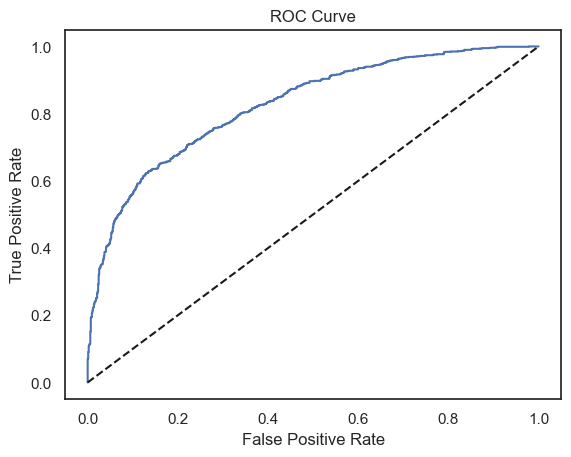

len(train_df) = 16721, len(test_df) = 1858
SentimentRNN(
  (embedding): Embedding(10708, 128)
  (embedding_driv): Embedding(396, 32)
  (embedding_len): Embedding(37, 2)
  (lstm): LSTM(128, 128, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc_static_1): Linear(in_features=43, out_features=128, bias=True)
  (fc_static_2): Linear(in_features=128, out_features=128, bias=True)
  (fc): Linear(in_features=128, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (sig): Sigmoid()
)
851 504
Epoch 1
train_loss : 0.6681466327114726 val_loss : 0.6299158031657591
train_accuracy : 58.87805753244423 val_accuracy : 65.1237890204521
val_precision : 62.80442804428045
Validation loss decreased (inf --> 0.629916).  Saving model ...
773 381
Epoch 2
train_loss : 0.6203863008756255 val_loss : 0.6018693224858429
train_accuracy : 66.07858381675737 val_accurac

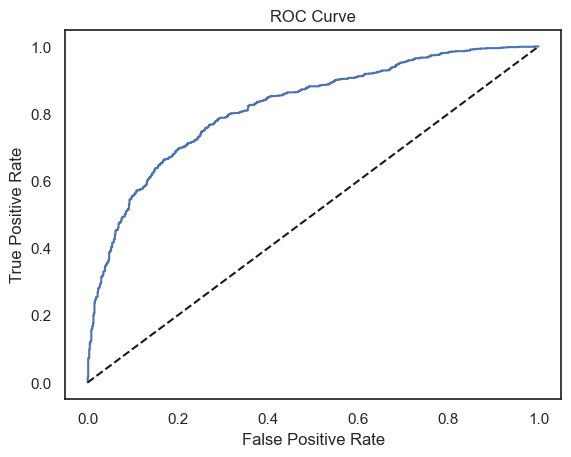

len(train_df) = 16721, len(test_df) = 1858
SentimentRNN(
  (embedding): Embedding(10708, 128)
  (embedding_driv): Embedding(396, 32)
  (embedding_len): Embedding(37, 2)
  (lstm): LSTM(128, 128, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc_static_1): Linear(in_features=43, out_features=128, bias=True)
  (fc_static_2): Linear(in_features=128, out_features=128, bias=True)
  (fc): Linear(in_features=128, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (sig): Sigmoid()
)
738 390
Epoch 1
train_loss : 0.669155052355553 val_loss : 0.6321075841531916
train_accuracy : 58.55511034029065 val_accuracy : 65.17761033369214
val_precision : 65.42553191489363
Validation loss decreased (inf --> 0.632108).  Saving model ...
767 366
Epoch 2
train_loss : 0.6234532863072638 val_loss : 0.6005995647381928
train_accuracy : 65.43866993600861 val_accurac

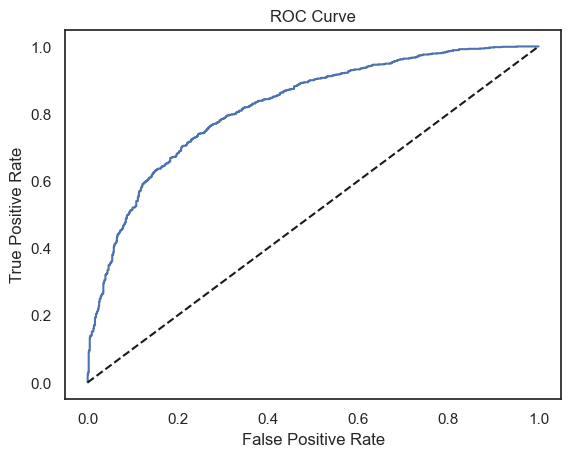

len(train_df) = 16721, len(test_df) = 1858
SentimentRNN(
  (embedding): Embedding(10708, 128)
  (embedding_driv): Embedding(396, 32)
  (embedding_len): Embedding(37, 2)
  (lstm): LSTM(128, 128, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc_static_1): Linear(in_features=43, out_features=128, bias=True)
  (fc_static_2): Linear(in_features=128, out_features=128, bias=True)
  (fc): Linear(in_features=128, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (sig): Sigmoid()
)
771 441
Epoch 1
train_loss : 0.6725375349161502 val_loss : 0.6338923654313815
train_accuracy : 57.26332157167634 val_accuracy : 64.20882669537137
val_precision : 63.613861386138616
Validation loss decreased (inf --> 0.633892).  Saving model ...
781 394
Epoch 2
train_loss : 0.6248196300767348 val_loss : 0.6089519797745397
train_accuracy : 65.7077925961366 val_accura

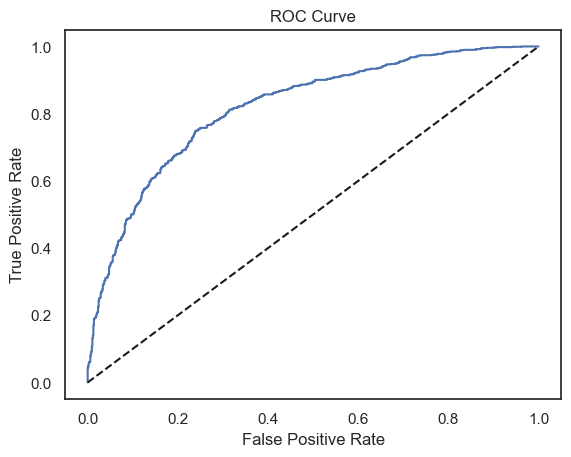

len(train_df) = 16721, len(test_df) = 1858
SentimentRNN(
  (embedding): Embedding(10708, 128)
  (embedding_driv): Embedding(396, 32)
  (embedding_len): Embedding(37, 2)
  (lstm): LSTM(128, 128, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc_static_1): Linear(in_features=43, out_features=128, bias=True)
  (fc_static_2): Linear(in_features=128, out_features=128, bias=True)
  (fc): Linear(in_features=128, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (sig): Sigmoid()
)
812 478
Epoch 1
train_loss : 0.6736214601970767 val_loss : 0.6257090038162166
train_accuracy : 57.14969200406674 val_accuracy : 64.42411194833154
val_precision : 62.945736434108525
Validation loss decreased (inf --> 0.625709).  Saving model ...
786 377
Epoch 2
train_loss : 0.6305595148589825 val_loss : 0.602359493405132
train_accuracy : 65.8274026673046 val_accurac

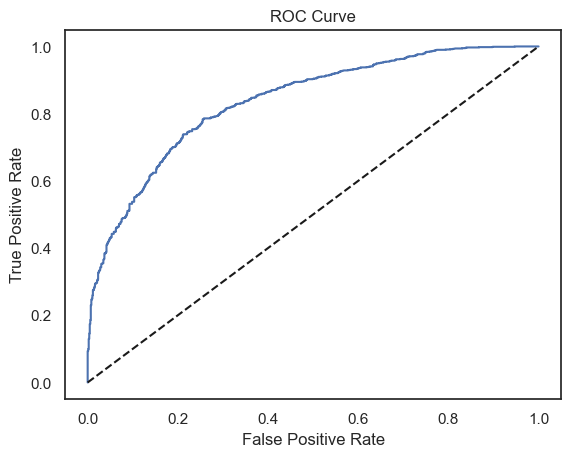

len(train_df) = 16721, len(test_df) = 1858
SentimentRNN(
  (embedding): Embedding(10708, 128)
  (embedding_driv): Embedding(396, 32)
  (embedding_len): Embedding(37, 2)
  (lstm): LSTM(128, 128, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc_static_1): Linear(in_features=43, out_features=128, bias=True)
  (fc_static_2): Linear(in_features=128, out_features=128, bias=True)
  (fc): Linear(in_features=128, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (sig): Sigmoid()
)
818 512
Epoch 1
train_loss : 0.6718636388760452 val_loss : 0.6393805944313438
train_accuracy : 58.01088451647629 val_accuracy : 62.91711517761034
val_precision : 61.503759398496236
Validation loss decreased (inf --> 0.639381).  Saving model ...
766 374
Epoch 2
train_loss : 0.6292738808500608 val_loss : 0.6069355834338624
train_accuracy : 65.40278691465822 val_accur

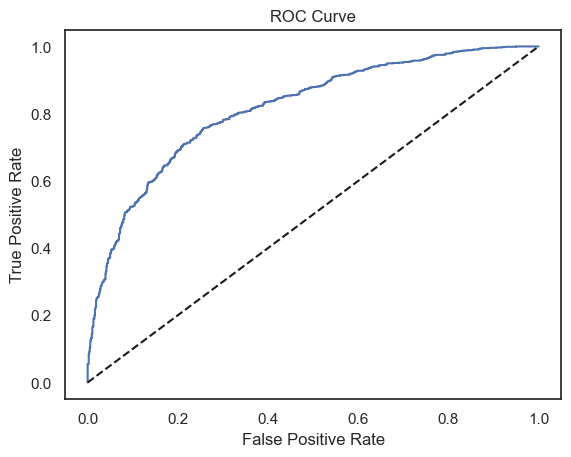

len(train_df) = 16721, len(test_df) = 1858
SentimentRNN(
  (embedding): Embedding(10708, 128)
  (embedding_driv): Embedding(396, 32)
  (embedding_len): Embedding(37, 2)
  (lstm): LSTM(128, 128, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc_static_1): Linear(in_features=43, out_features=128, bias=True)
  (fc_static_2): Linear(in_features=128, out_features=128, bias=True)
  (fc): Linear(in_features=128, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (sig): Sigmoid()
)
771 437
Epoch 1
train_loss : 0.6719905837771998 val_loss : 0.6271243893494041
train_accuracy : 57.10184797559954 val_accuracy : 64.42411194833154
val_precision : 63.824503311258276
Validation loss decreased (inf --> 0.627124).  Saving model ...
733 328
Epoch 2
train_loss : 0.6284815368187359 val_loss : 0.5908268215292591
train_accuracy : 65.40876741821661 val_accur

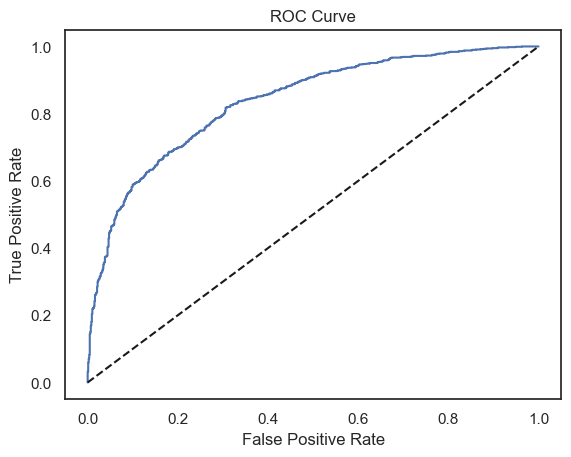

len(train_df) = 16721, len(test_df) = 1858
SentimentRNN(
  (embedding): Embedding(10708, 128)
  (embedding_driv): Embedding(396, 32)
  (embedding_len): Embedding(37, 2)
  (lstm): LSTM(128, 128, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc_static_1): Linear(in_features=43, out_features=128, bias=True)
  (fc_static_2): Linear(in_features=128, out_features=128, bias=True)
  (fc): Linear(in_features=128, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (sig): Sigmoid()
)
804 515
Epoch 1
train_loss : 0.669027133380022 val_loss : 0.6587439351162668
train_accuracy : 58.85413551821064 val_accuracy : 62.002152852529605
val_precision : 60.955269143290366
Validation loss decreased (inf --> 0.658744).  Saving model ...
811 474
Epoch 2
train_loss : 0.6237757150119395 val_loss : 0.6235809689861233
train_accuracy : 65.81544166018779 val_accur

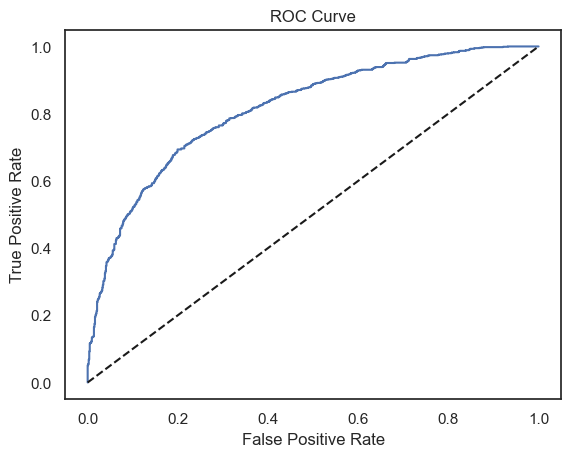

len(train_df) = 16721, len(test_df) = 1858
SentimentRNN(
  (embedding): Embedding(10708, 128)
  (embedding_driv): Embedding(396, 32)
  (embedding_len): Embedding(37, 2)
  (lstm): LSTM(128, 128, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc_static_1): Linear(in_features=43, out_features=128, bias=True)
  (fc_static_2): Linear(in_features=128, out_features=128, bias=True)
  (fc): Linear(in_features=128, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (sig): Sigmoid()
)
810 465
Epoch 1
train_loss : 0.6792974906259468 val_loss : 0.642865846722813
train_accuracy : 56.74301776209557 val_accuracy : 65.01614639397201
val_precision : 63.52941176470588
Validation loss decreased (inf --> 0.642866).  Saving model ...
808 414
Epoch 2
train_loss : 0.6360744268100986 val_loss : 0.6092448729579731
train_accuracy : 64.27247174212069 val_accurac

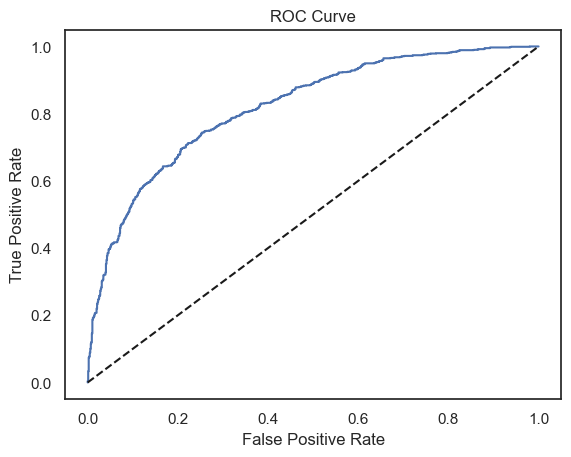

len(train_df) = 16722, len(test_df) = 1857
SentimentRNN(
  (embedding): Embedding(10708, 128)
  (embedding_driv): Embedding(396, 32)
  (embedding_len): Embedding(37, 2)
  (lstm): LSTM(128, 128, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc_static_1): Linear(in_features=43, out_features=128, bias=True)
  (fc_static_2): Linear(in_features=128, out_features=128, bias=True)
  (fc): Linear(in_features=128, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (sig): Sigmoid()
)
780 442
Epoch 1
train_loss : 0.6672423793070631 val_loss : 0.6361074053635032
train_accuracy : 58.79679464178926 val_accuracy : 64.62035541195476
val_precision : 63.829787234042556
Validation loss decreased (inf --> 0.636107).  Saving model ...
801 415
Epoch 2
train_loss : 0.6218706830965629 val_loss : 0.6215894282874415
train_accuracy : 66.23011601483077 val_accur

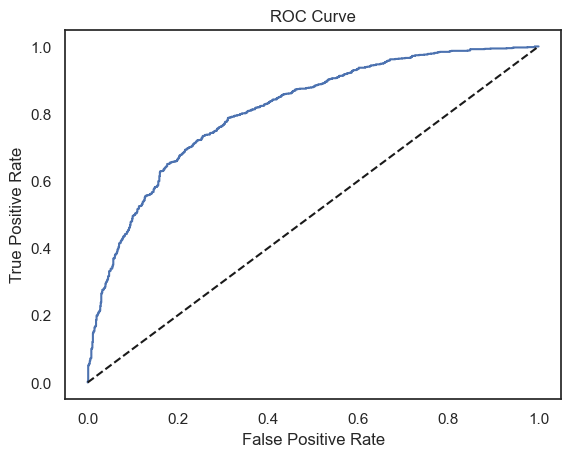

In [175]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed_value)

stats = []

FEATURE_COLUMNS = ['routes', 'driver_id_feature', 'driver_id_sorted','last_two_weeks_count', 'len', 'day_of_week_feature', 'day_of_week_encoded_ext', 'country_flag', 'location_is_depot', 'location_type_id', 'distance_route']


class DataFrameDataset(Dataset):
    def __init__(self, df):
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        item = {}
        for col in FEATURE_COLUMNS:
            feature = self.df[col].iloc[idx]
            if isinstance(feature, list):
                feature = padding_([feature], max_route_length)[0]
            item[col] = feature
        item['label'] = self.df['label'].iloc[idx]
        return item, item['label']

def get_data_loaders(train_df, test_df):
    # create Tensor datasets
    train_data = DataFrameDataset(train_df)
    valid_data = DataFrameDataset(test_df)

    # dataloaders
    batch_size = 32

    # make sure to SHUFFLE your data
    train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, generator=g, worker_init_fn=seed_worker)
    valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size, generator=g, worker_init_fn=seed_worker)
    return train_loader, valid_loader

shuffled_df = final_routes.sample(frac=1, random_state=42).reset_index(drop=True)

for train_index, test_index in kf.split(shuffled_df, shuffled_df['label']):
    train_df = shuffled_df.iloc[train_index]
    test_df = shuffled_df.iloc[test_index]

    train_loader, valid_loader = get_data_loaders(train_df, test_df)
    print(f'len(train_df) = {len(train_df)}, len(test_df) = {len(test_df)}')
    model = get_model()
    model.train()

    train_model((train_loader, valid_loader), model, epochs=35)
    stats.append(get_stats(model, valid_loader))

acc: 0.7446575173332453
precision: 0.7585212015989986
recall: 0.7685665274161975
f1: 0.7631159851264502
roc_auc: 0.8218706238330142
average_precision: 0.8405218233481374
quadratic_loss: 0.34414739422371293
brier_score: 0.17207369710532258


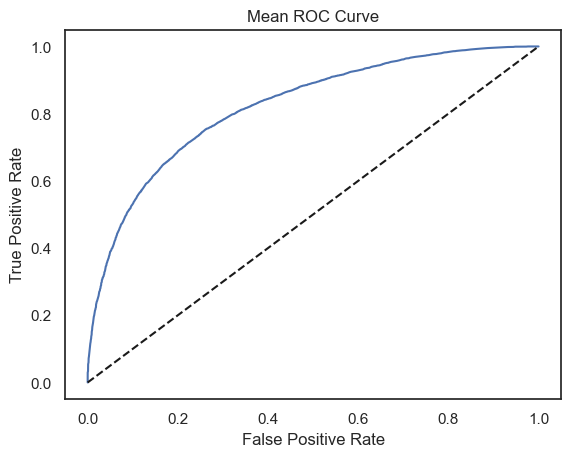

In [176]:
def get_mean_stat(stats, stat_name):
    if stat_name in ["fpr", "tpr"]:
        # Calculate mean fpr and tpr
        values = [item[stat_name] for item in stats]
        min_len = min(len(value) for value in values)
        interpolated_values = []
        for value in values:
            interpolated = np.interp(np.linspace(0, 1, min_len), np.linspace(0, 1, len(value)), value)
            interpolated_values.append(interpolated)
        mean_values = np.array(interpolated_values).mean(axis=0)
        return mean_values
    else:
        # Calculate mean for other stats
        arr = np.array([item[stat_name] for item in stats])
        return arr.mean()

print('acc:', get_mean_stat(stats, 'acc'))
print('precision:', get_mean_stat(stats, 'precision'))
print('recall:', get_mean_stat(stats, 'recall'))
print('f1:', get_mean_stat(stats, 'f1'))
print('roc_auc:', get_mean_stat(stats, 'roc_auc'))
print('average_precision:', get_mean_stat(stats, 'average_precision'))
print('quadratic_loss:', get_mean_stat(stats, 'quadratic_loss'))
print('brier_score:', get_mean_stat(stats, 'brier_score'))
mean_fpr = get_mean_stat(stats, 'fpr')
mean_tpr = get_mean_stat(stats, 'tpr')

plt.plot(mean_fpr, mean_tpr)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC Curve')
plt.show()

In [ ]:
# from sklearn.model_selection import train_test_split
#
# reset_random()
# X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=seed_value)
# train_loader, valid_loader = get_data_loaders(X_train, y_train, X_val, y_val)
#
# model = get_model()
# # summary(model, input_size=(1,9))
# model.train()
#
# train_model((train_loader, valid_loader), model, epochs=50)
#
# get_stats(model, valid_loader)

In [ ]:
get_stats(model, valid_loader)
# def get_mean_stat(stats, stat_name) -> float:
#     return np.array([item[stat_name] for item in stats]).mean()
#
# print('acc:', get_mean_stat(stats, 'acc'))
# print('precision:', get_mean_stat(stats, 'precision'))
# print('recall:', get_mean_stat(stats, 'recall'))
# print('f1:', get_mean_stat(stats, 'f1'))
# print('roc_auc:', get_mean_stat(stats, 'roc_auc'))
# print('average_precision:', get_mean_stat(stats, 'average_precision'))

In [ ]:
print(stats)

In [ ]:
print(model.fc.weight)